<a href="https://colab.research.google.com/github/pesfahanian/Computational_Geometry/blob/master/Computational_Geometry_Fast_convex_hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Input:    A list of n point L = [p1, p2, ... , pn].
# Output:   A sublist of L as the convex hull CH(L) of L.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def orientation(points):
    data = np.array(points)
    x, y = data.T
    o = (data[1][1] - data[0][1])*(data[2][0] - data[1][0]) - (data[2][1] - data[1][1])*(data[1][0] - data[0][0])
    if(o > 0):
        return "Right turn (Clockwise)"
    if(o < 0):
        return "Left turn (Counter_Clockwise)"
    if(o == 0):
        return "Line"

In [0]:
def fast_convex_hull(points):
    points.sort()
    print(points)
    stack_upper = []
    stack_upper.append(points[0])
    stack_upper.append(points[1])
    # print(stack)
    for i in range(2, len(points)):
        stack_upper.append(points[i])
        # print('investigating:', stack_upper[-3], stack_upper[-2], stack_upper[-1])
        # o1 = orientation([stack_upper[-3], stack_upper[-2], stack_upper[-1]])
        # print('orientation:', o1)
        while((len(stack_upper)>2) and (orientation([stack_upper[-3], stack_upper[-2], stack_upper[-1]]) != "Right turn (Clockwise)")):
            # print('deleting', stack_upper[-2])
            del stack_upper[-2]
        # print('------------')
    # print('stack upper:', stack_upper)
    stack_lower = []
    stack_lower.append(points[-1])
    stack_lower.append(points[-2])
    for j in range(len(points)-3, 0, -1):
        stack_lower.append(points[j])
        # print('investigating:', stack_upper[-3], stack_upper[-2], stack_upper[-1])
        # o2 = orientation([stack_lower[-3], stack_lower[-2], stack_lower[-1]])
        # print('orientation:', o2)
        while((len(stack_lower)>2) and (orientation([stack_lower[-3], stack_lower[-2], stack_lower[-1]]) != "Right turn (Clockwise)")):
            del stack_lower[-2]
    # print('stack lower:', stack_lower)
    # del stack_upper[0]
    del stack_upper[-1]
    stack = stack_upper + stack_lower
    return stack

[(-10, 3), (-10, 4), (-9, -5), (-8, -2), (-8, 0), (-7, 8), (-4, 6), (-2, 2), (0, -6), (0, 0), (2, 6), (3, -2), (4, -6), (6, -10), (6, 4), (7, -2), (8, -7), (8, 6)]
Convex hull: [(-10, 3), (-10, 4), (-7, 8), (8, 6), (8, -7), (6, -10), (-9, -5), (-10, 4)]


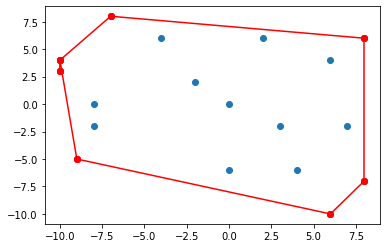

In [0]:
L = [(-7, 8), (-4, 6), (2, 6), (6, 4), (8, 6), (7, -2), (4, -6), (8, -7), (0, 0), (3, -2), (6, -10), (0, -6), (-9, -5), (-8, -2), (-8, 0), (-10, 3), (-2, 2), (-10, 4)]
# L = [(-7, 8), (-4, 6), (2, 6), (6, 4), (8, 6), (7, -2), (4, -6), (8, -7), (0, 0), (3, -2), (6, -10)]
# L = [(0, 3), (2, 2), (1, 1), (2, 1), (3, 0), (0, 0), (3, 3)]
CH = fast_convex_hull(L)
print('Convex hull:', CH)
CH.append(CH[0])
a, b = np.array(L).T
plt.scatter(a, b)
x, y = np.array(CH).T
for i in range(0, len(x), 1):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
plt.show()